In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Load the dataset
df = pd.read_csv("C:/Users/shram/Downloads/Real time Air Quality Index.csv")

In [3]:
df

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",11-04-2024 18:00:00,16.515083,80.518167,NH3,3.0,4.0,4.0
1,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",11-04-2024 18:00:00,14.675886,77.593027,PM10,72.0,106.0,90.0
2,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",11-04-2024 18:00:00,14.465052,78.824187,OZONE,16.0,73.0,50.0
3,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",11-04-2024 18:00:00,16.987287,81.736318,PM2.5,39.0,407.0,117.0
4,India,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",11-04-2024 18:00:00,13.670000,79.350000,PM2.5,32.0,95.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
3267,India,West_Bengal,Kolkata,"Jadavpur, Kolkata - WBPCB",11-04-2024 18:00:00,22.499290,88.369170,OZONE,8.0,117.0,77.0
3268,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",11-04-2024 18:00:00,22.511060,88.351420,SO2,21.0,101.0,41.0
3269,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",11-04-2024 18:00:00,22.544808,88.340369,PM10,119.0,165.0,147.0
3270,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",11-04-2024 18:00:00,26.687923,88.415250,PM2.5,58.0,77.0,67.0


In [4]:
#Separating station and its location
df[['station', 'station_location']] = df['station'].str.split(', ', n=1, expand=True)

In [5]:
df

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,station_location
0,India,Andhra_Pradesh,Amaravati,Secretariat,11-04-2024 18:00:00,16.515083,80.518167,NH3,3.0,4.0,4.0,Amaravati - APPCB
1,India,Andhra_Pradesh,Anantapur,Gulzarpet,11-04-2024 18:00:00,14.675886,77.593027,PM10,72.0,106.0,90.0,Anantapur - APPCB
2,India,Andhra_Pradesh,Kadapa,Yerramukkapalli,11-04-2024 18:00:00,14.465052,78.824187,OZONE,16.0,73.0,50.0,Kadapa - APPCB
3,India,Andhra_Pradesh,Rajamahendravaram,Anand Kala Kshetram,11-04-2024 18:00:00,16.987287,81.736318,PM2.5,39.0,407.0,117.0,Rajamahendravaram - APPCB
4,India,Andhra_Pradesh,Tirupati,Tirumala,11-04-2024 18:00:00,13.670000,79.350000,PM2.5,32.0,95.0,61.0,Tirupati - APPCB
...,...,...,...,...,...,...,...,...,...,...,...,...
3267,India,West_Bengal,Kolkata,Jadavpur,11-04-2024 18:00:00,22.499290,88.369170,OZONE,8.0,117.0,77.0,Kolkata - WBPCB
3268,India,West_Bengal,Kolkata,Rabindra Sarobar,11-04-2024 18:00:00,22.511060,88.351420,SO2,21.0,101.0,41.0,Kolkata - WBPCB
3269,India,West_Bengal,Kolkata,Victoria,11-04-2024 18:00:00,22.544808,88.340369,PM10,119.0,165.0,147.0,Kolkata - WBPCB
3270,India,West_Bengal,Siliguri,Ward-32 Bapupara,11-04-2024 18:00:00,26.687923,88.415250,PM2.5,58.0,77.0,67.0,Siliguri - WBPCB


In [6]:
#Shape of dataframe
df.shape

(3272, 12)

In [7]:
#Information of Dataset
df.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3272.000000,3272.000000,2938.000000,2938.000000,2938.000000
mean,22.839685,78.539891,25.013615,88.519401,50.982982
std,5.370899,4.843461,28.507640,97.894942,54.277171
min,8.514909,70.909168,1.000000,1.000000,1.000000
25%,19.086300,75.563181,5.000000,20.000000,13.000000
50%,23.540435,77.298051,15.000000,58.000000,33.000000
75%,27.215415,80.322986,34.000000,113.000000,70.000000
max,31.620000,94.636574,304.000000,500.000000,355.000000


In [8]:
#checking missing values
df.isnull().sum()

country               0
state                 0
city                  0
station               0
last_update           0
latitude              0
longitude             0
pollutant_id          0
pollutant_min       334
pollutant_max       334
pollutant_avg       334
station_location      7
dtype: int64

In [9]:
#Getting value counts of column country
df.value_counts('country')

country
India    3272
dtype: int64

In [10]:
#Getting value counts of column state
df.value_counts('state')

state
Maharashtra          564
Uttar_Pradesh        350
Rajasthan            321
Delhi                256
Karnataka            247
Bihar                217
Haryana              194
Madhya Pradesh       163
TamilNadu            119
Odisha               116
West_Bengal          112
Gujarat               96
Telangana             88
Chhattisgarh          85
Andhra_Pradesh        79
Assam                 55
Punjab                51
Kerala                35
Chandigarh            21
Uttarakhand           20
Jharkhand             18
Manipur               12
Nagaland               7
Puducherry             7
Sikkim                 7
Himachal Pradesh       7
Tripura                7
Arunachal_Pradesh      6
Meghalaya              6
Mizoram                6
dtype: int64

In [11]:
#Getting count of column city
len(df.value_counts('city'))

263

In [12]:
#Getting count of column station
len(df.value_counts('station'))

471

In [13]:
#Getting value counts of pollutant id
df.value_counts('pollutant_id')

pollutant_id
PM2.5    483
NO2      477
CO       475
PM10     475
OZONE    469
SO2      467
NH3      426
dtype: int64

In [14]:
#Subtituting null values with mode

In [15]:
df.isnull().sum()

country               0
state                 0
city                  0
station               0
last_update           0
latitude              0
longitude             0
pollutant_id          0
pollutant_min       334
pollutant_max       334
pollutant_avg       334
station_location      7
dtype: int64

In [16]:
df_filled = df.fillna(df.mode().iloc[0])

In [17]:
#Verifying that null values are replaced with mode
df_filled.isnull().sum()

country             0
state               0
city                0
station             0
last_update         0
latitude            0
longitude           0
pollutant_id        0
pollutant_min       0
pollutant_max       0
pollutant_avg       0
station_location    0
dtype: int64

In [18]:
#Taking required columns are input
X=df_filled.iloc[:, [2,3, 5, 6, 7, 11]]
X

,city,station,latitude,longitude,pollutant_id,station_location
0,Amaravati,Secretariat,16.515083,80.518167,NH3,Amaravati - APPCB
1,Anantapur,Gulzarpet,14.675886,77.593027,PM10,Anantapur - APPCB
2,Kadapa,Yerramukkapalli,14.465052,78.824187,OZONE,Kadapa - APPCB
3,Rajamahendravaram,Anand Kala Kshetram,16.987287,81.736318,PM2.5,Rajamahendravaram - APPCB
4,Tirupati,Tirumala,13.670000,79.350000,PM2.5,Tirupati - APPCB
...,...,...,...,...,...,...
3267,Kolkata,Jadavpur,22.499290,88.369170,OZONE,Kolkata - WBPCB
3268,Kolkata,Rabindra Sarobar,22.511060,88.351420,SO2,Kolkata - WBPCB
3269,Kolkata,Victoria,22.544808,88.340369,PM10,Kolkata - WBPCB
3270,Siliguri,Ward-32 Bapupara,26.687923,88.415250,PM2.5,Siliguri - WBPCB


In [19]:
#Taking required column for output
#Here we are taking pollutant_avg as output
y = df_filled.iloc[:, 10]
y

0         4.0
1        90.0
2        50.0
3       117.0
4        61.0
        ...  
3267     77.0
3268     41.0
3269    147.0
3270     67.0
3271     68.0
Name: pollutant_avg, Length: 3272, dtype: float64

In [20]:
#Using one hot encoding to convert categorical variable like city, station, pollutant_id and station_location in numerical
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 4, 5])], remainder='passthrough')
X_encoded = ct.fit_transform(X)

In [21]:
X_encoded

<3272x1030 sparse matrix of type '<class 'numpy.float64'>'
	with 19632 stored elements in Compressed Sparse Row format>

In [53]:
#XGBoost

X = X_encoded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Specify the objective (loss function)
    'eval_metric': 'rmse'              # Specify evaluation metric
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds (trees)
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Calculate Mean Squared Error and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) score:", r2)


Mean Squared Error: 1047.5737135609338
R-squared (R2) score: 0.6166307083659528


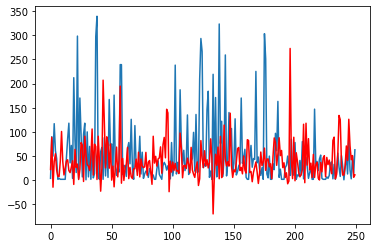

In [54]:
#Visualising first 250 data points original y and predicted y
plt.plot(y[:][:250])
plt.plot(y_pred[:][:250], color='red')

In [55]:
#Random Forest

X=X_encoded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.ravel())  # ravel() is used to convert y_train to a 1D array

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) score:", r2)


Mean Squared Error: 1066.0969453435116
R-squared (R2) score: 0.6098519603357817


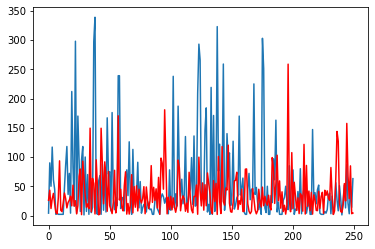

In [56]:
#Visualising first 250 data points original y and predicted y
plt.plot(y[:][:250])
plt.plot(y_pred[:][:250], color='red')